# Numerical differentiation

$f_E(x_0) = \frac{f(x_0+h) - f(x_0)}{h}$

In [1]:
# define the forward equasion
def df_forward(f, x0, h):
    fx0h = f(x0 + h)
    fx0 = f(x0)
    return ( fx0h - fx0 ) / h

In [2]:
# define central equasion
def df_central(f, x0, h):
    fx0h = f(x0 + h)
    fx0mh = f(x0 - h)
    return ( fx0h - fx0mh ) / h / 2


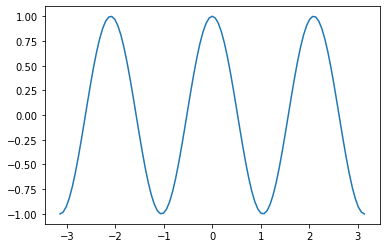

In [3]:
# drawing the analytic equasion
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, 101)

def f(x):
    return np.cos(3*x)

f = lambda x: np.cos(3*x)

y = np.array([ f(x_) for x_ in x])
plt.plot(x,y)

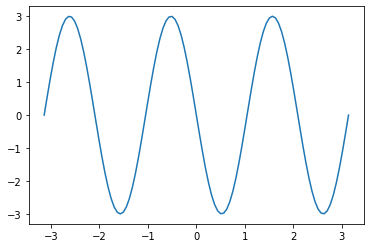

In [4]:
# drawing the analytic differintial
fdiff = lambda x: -3*np.sin(3*x)
ydiff = np.array([ fdiff(x_ ) for x_ in x])
plt.plot(x, ydiff)

(2.5, 3.2)

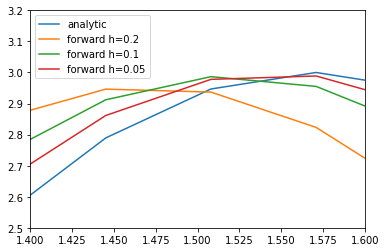

In [5]:
# showing the different (error) between the analitical and different values of $lambda
yd_f01 = np.array([ df_forward(f, x_, 0.1) for x_ in x ])
yd_f02 = np.array([ df_forward(f, x_, 0.2) for x_ in x ])
yd_f005 = np.array([ df_forward(f, x_, 0.05) for x_ in x ])
plt.plot(x, ydiff, label='analytic')
plt.plot(x, yd_f02, label='forward h=0.2')
plt.plot(x, yd_f01, label='forward h=0.1')
plt.plot(x, yd_f005, label='forward h=0.05')
plt.legend(loc=2)
plt.xlim([1.4,1.6])
plt.ylim([2.5,3.2])

In [6]:
# calculate the errors
( 
np.linalg.norm(ydiff - yd_f01, ord=1),
np.linalg.norm(ydiff - yd_f01, ord=2),
np.linalg.norm(ydiff - yd_f01, ord=np.inf) 
)

(29.027210519641812, 3.205303679884915, 0.4487279273563949)

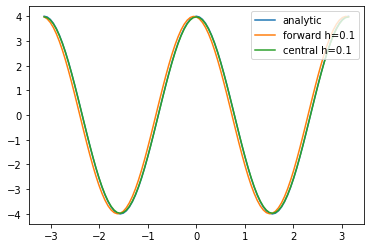

In [11]:
# Calculate and plot analytical and numerical derivate for the function on the range  [−𝜋,𝜋]
#  with 101 points with  ℎ=0.1 for both central and forward schemes.
x = np.linspace(-np.pi, np.pi, 101)
f = lambda x: 2*np.sin(2*x)
fdiff = lambda x: 4*np.cos(2*x)
ydiff = np.array([ fdiff(x_) for x_ in x])
yd_f01 = np.array([ df_forward(f, x_, 0.1) for x_ in x ])
yd_c01 = np.array([ df_central(f, x_, 0.1) for x_ in x ])
plt.plot(x,ydiff, label="analytic")
plt.plot(x,yd_f01, label="forward h=0.1")
plt.plot(x,yd_c01, label="central h=0.1")
plt.legend(loc=1)

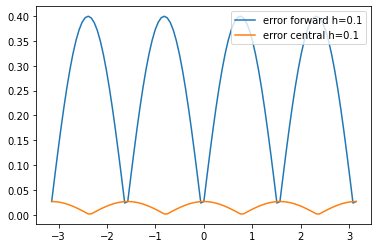

In [12]:
plt.plot(x,abs(ydiff-yd_f01), label="error forward h=0.1")
plt.plot(x,abs(ydiff-yd_c01), label="error central h=0.1")
plt.legend(loc=1)

In [13]:
# define range for the exponent of h
eord = np.inf
hexps = np.linspace(-1, -9, 9)
hs = [ 10**hexp for hexp in hexps]
ferrs = []
cerrs = []
for hexp in hexps:
    yd_fh = np.array([ df_forward(f, x_, 10**hexp) for x_ in x ])
    err = np.linalg.norm(ydiff - yd_fh, ord=eord)
#    print(hexp, 10**hexp, err)
    ferrs.append(err)
for hexp in hexps:
    yd_fh = np.array([ df_central(f, x_, 10**hexp) for x_ in x ])
    err = np.linalg.norm(ydiff - yd_fh, ord=eord)
#    print(hexp, 10**hexp, err)
    cerrs.append(err)

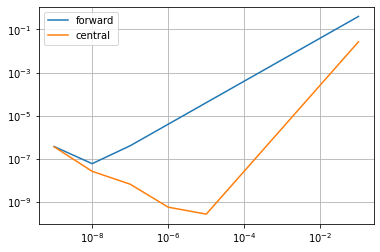

In [14]:
plt.loglog(hs, ferrs, label="forward")
plt.loglog(hs, cerrs, label="central")
plt.grid()
plt.legend(loc=2)